In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Should the World go Vegan? ##
##### A STUDY ON ENVIRONMENTAL IMPACT OF AGRICULTURE vs. LIVESTOCK #####

1. Are greenhouse gas emissions higher on agriculture or on livestock?
1.1. A closer look at the nitrogen emission on livestock.

2. Analysing growth in agriculture and livestock production.

3. An intake on Brazil: Relationship between forest fires and agriculture vs. livestock.
3.1. Economics and environmental impact.

4. Is the increase/decrease on agriculture/livestock production actually impacting the environment?
A closer look at temperature changes in the areas with highest gas emitions vs. nitrogen.

##### Presentation: #####
https://www.canva.com/design/DADseeDA_ZU/-toR71-UUnvmv1gAWWp_2w/edit


#### GREENHOUSE GAS EMISSIONS ####

In [2]:
# emissions on land for grass / livestock
data_lgas = pd.read_csv('..\data\FAOSTAT_land.csv')
land_gas = data_lgas[['Area', 'Element', 'Item', 'Year', 'Value']]
# removing zero values, considered misinformation
land_gas = land_gas[(land_gas['Value'] > 0) & (land_gas['Item'] == 'Grassland')]
# per region
land_gas = land_gas.groupby(by=['Area', 'Year']).agg({'Value': 'sum'})
# per year, using the mean to be able to compare, since there are some values missing (zeros)
land_years = pd.pivot_table(land_gas, columns='Year', aggfunc=sum)
land_gas

Value
Area    Year           
Albania 2007    13.4502
        2008    13.4502
        2009    13.4502
        2010    13.4502
        2011    13.4502
...                 ...
Zambia  2013  8654.3456
        2014  8647.7002
        2015  8647.7002
        2016  8647.7002
        2017  8647.7002

[1133 rows x 1 columns]

In [3]:
# emissions on land for agriculture
agri_gas = pd.read_csv('..\data\FAOSTAT_agriculture.csv')
agri_gas = agri_gas[['Area', 'Element', 'Year', 'Value']]
# removing zero values, considered misinformation
agri_gas = agri_gas[agri_gas['Value'] > 0]

# per region
agri_gas = agri_gas.groupby(by=['Area', 'Year']).agg({'Value': 'sum'})
# per year, using the mean to be able to compare, since there are some values missing (zeros)
agri_years = pd.pivot_table(agri_gas, columns='Year', aggfunc=sum)
out_agri = agri_gas.unstack().xs('Value', axis=1, drop_level=True)
out_agri.info()
agri_gas


<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
2007    218 non-null float64
2008    219 non-null float64
2009    219 non-null float64
2010    219 non-null float64
2011    218 non-null float64
2012    219 non-null float64
2013    219 non-null float64
2014    219 non-null float64
2015    219 non-null float64
2016    219 non-null float64
2017    221 non-null float64
dtypes: float64(11)
memory usage: 20.9+ KB


Value
Area        Year            
Afghanistan 2007  22063.8985
            2008  24449.4673
            2009  25245.0956
            2010  28827.5425
            2011  28948.5804
...                      ...
Zimbabwe    2013  23525.3174
            2014  20583.8295
            2015  21613.7314
            2016  21427.3600
            2017  23215.8410

[2409 rows x 1 columns]

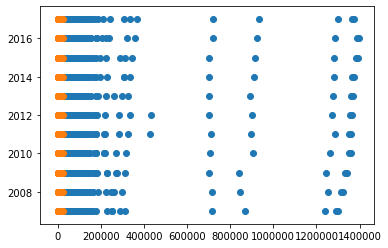

In [4]:
merge_gas = agri_gas.merge(land_gas, how='outer')
#plt.scatter()
plt.scatter(agri_gas['Value'], agri_gas.reset_index(level=1)['Year'])
plt.scatter(land_gas['Value'], land_gas.reset_index(level=1)['Year'])

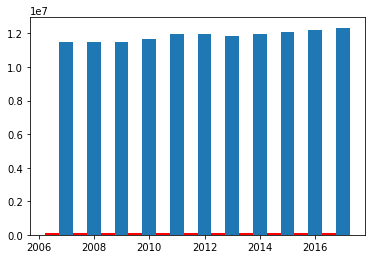

In [5]:

#plt.bar(land_years.T.index, [land_years.T['Value'],  agri_years.T['Value']])
#plt.bar(agri_years.T.index, agri_years.T['Value'])

ax = plt.subplot(111)
ax.bar(land_years.T.index-0.5, land_years.T['Value'], width=0.5, color = 'r' ,align='center')
ax.bar(land_years.T.index, agri_years.T['Value'], width=0.5, align='center')

plt.show()

<BarContainer object of 11 artists>

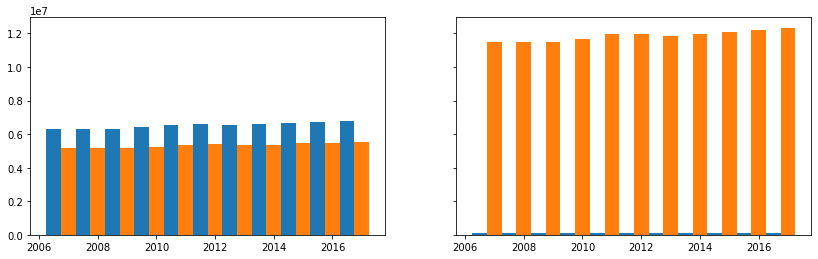

In [6]:
# considering that 55% of crop is grown for livestock feed
agri_gas['land'] = agri_gas.apply(lambda x: x['Value']*0.55, axis=1)
agri_gas['agri'] = agri_gas.apply(lambda x: x['Value']*0.45, axis=1)
agri_years_a = pd.pivot_table(agri_gas, columns='Year', aggfunc=sum)

# new plot
fig, ax = plt.subplots(1,2, sharey=True, figsize=(14,4))
ax[0].bar(land_years.T.index-0.5, agri_years_a.T['land'], width=0.5,align='center')
ax[0].bar(land_years.T.index, agri_years_a.T['agri'], width=0.5, align='center')
ax[1].bar(land_years.T.index-0.5, land_years.T['Value'], width=0.5, align='center')
ax[1].bar(land_years.T.index, agri_years.T['Value'], width=0.5, align='center')



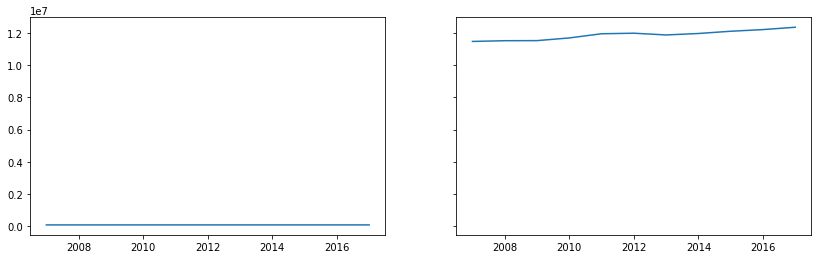

In [7]:
# plotting
fig, ax = plt.subplots(1,2, sharey=True, figsize=(14,4))
ax[0].plot(land_years.columns, land_years.values.T)
ax[1].plot(agri_years.columns, agri_years.values.T)
plt.show()

In [8]:
# checking for outliers for livestock emissions
out_land = land_gas.unstack().xs('Value', axis=1, drop_level=True)
out_land.info()
out_land.describe()
# there are some nuns, but i don't think they are enough to mess the data like that
# checking for the countries with most emissions
print(out_land.sort_values(by=2017, ascending=False)[:5].sum() > \
      out_land.sort_values(by=2017, ascending=False)[5:].sum())
# the five most emiting countries has more than all the 189 other countries

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, Albania to Zambia
Data columns (total 11 columns):
2007    103 non-null float64
2008    103 non-null float64
2009    103 non-null float64
2010    103 non-null float64
2011    103 non-null float64
2012    103 non-null float64
2013    103 non-null float64
2014    103 non-null float64
2015    103 non-null float64
2016    103 non-null float64
2017    103 non-null float64
dtypes: float64(11)
memory usage: 9.8+ KB
Year
2007    True
2008    True
2009    True
2010    True
2011    True
2012    True
2013    True
2014    True
2015    True
2016    True
2017    True
dtype: bool


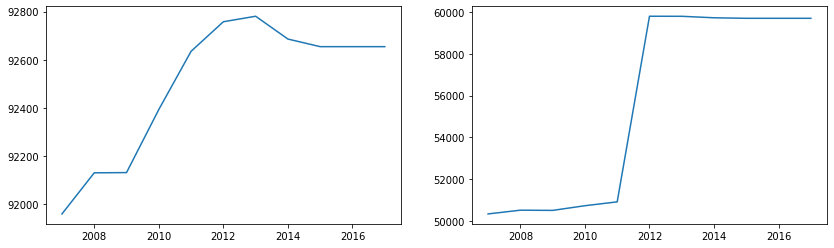

In [9]:
# the variation on the charts are because of them:
out_landers = out_land.sort_values(by=2017, ascending=False)[:6].sum() # 6 most emitting countries
out_landies = out_land.sort_values(by=2017, ascending=False)[6:].sum() # the other 189 countries
fig, ax = plt.subplots(1,2, figsize = (14,4))
ax[0].plot(land_years.columns, land_years.values.T)
ax[1].plot(out_landers)
# variation is similar to most emiting countries

In [10]:
# testing null hypothesis
stats.ttest_ind(land_years.T, out_landers)
# null hypothesis rejected

Ttest_indResult(statistic=array([25.56562141]), pvalue=array([9.51073766e-17]))

In [11]:
# there is a very high correlation between the 5 highest emiters and the total amount emited...
# not so much for the other 99 countries
out_landers.corr(land_years.T['Value']), out_landies.corr(land_years.T['Value'])

(0.8224378185311624, -0.8011626263905073)

In [12]:
# checking top agriculture emitters
agri_check = land_gas.unstack().xs('Value', axis=1, drop_level=True)
agri_check.info()
agri_check.describe()
# there are some nuns, but i don't think they are enough to mess the data like that
# checking for the countries with most emissions
print(agri_check.sort_values(by=2017, ascending=False)[:5].sum() > \
      agri_check.sort_values(by=2017, ascending=False)[5:].sum())
# the 5 most emiting countries has more than all the 99 other countries
agri_check.sort_values(by=2017, ascending=False)[:5]

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, Albania to Zambia
Data columns (total 11 columns):
2007    103 non-null float64
2008    103 non-null float64
2009    103 non-null float64
2010    103 non-null float64
2011    103 non-null float64
2012    103 non-null float64
2013    103 non-null float64
2014    103 non-null float64
2015    103 non-null float64
2016    103 non-null float64
2017    103 non-null float64
dtypes: float64(11)
memory usage: 9.8+ KB
Year
2007    True
2008    True
2009    True
2010    True
2011    True
2012    True
2013    True
2014    True
2015    True
2016    True
2017    True
dtype: bool


Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Area,,,,,,,,,,,
Indonesia,23068.6990,23256.5490,23278.3436,23483.1046,23683.0162,23813.2514,23868.3072,23851.0616,23847.9104,23847.9104,23847.9104
United States of America,13595.5500,13575.2776,13558.5180,13553.7566,13540.2742,13519.8828,13473.7640,13453.8176,13434.7358,13434.7358,13434.7358
South Sudan,NaN,NaN,NaN,NaN,NaN,8781.8156,8773.6954,8731.3806,8731.3806,8731.3806,8731.3806
Zambia,8675.3966,8672.5266,8656.8772,8661.5916,8658.3002,8655.8640,8654.3456,8647.7002,8647.7002,8647.7002,8647.7002
Argentina,2718.2574,2720.0400,2720.1410,2718.9266,2712.6174,2712.6078,2711.3162,2703.9184,2703.8906,2703.8906,2703.8906


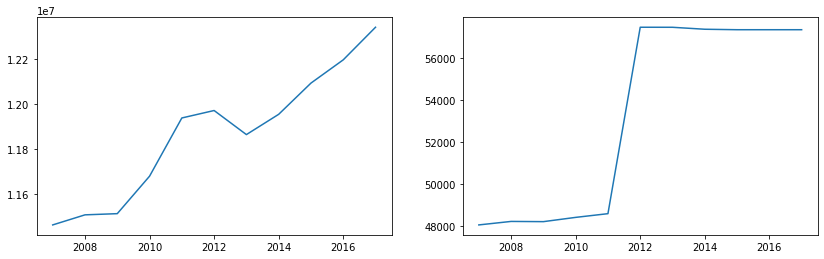

In [13]:
agri_top_five = agri_check.sort_values(by=2017, ascending=False)[:5].sum() # 6 most emitting countries
agri_others = agri_check.sort_values(by=2017, ascending=False)[5:].sum() # the other 189 countries
fig, ax = plt.subplots(1,2, figsize = (14,4))
ax[0].plot(agri_years.columns, agri_years.values.T)
ax[1].plot(agri_top_five)

In [14]:
# testing null hypothesis
stats.ttest_ind(agri_years.T, agri_top_five)
# null hypothesis rejected

Ttest_indResult(statistic=array([133.35488178]), pvalue=array([5.64235759e-31]))

In [15]:
agri_top_five.corr(agri_years.T['Value']), agri_others.corr(land_years.T['Value'])
# there is a very high correlation between the 5 highest emiters and the total amount emited...
# not so much for the other 99 countries which have negative correlation

(0.8088171166877585, -0.79998456226229)

In [16]:
# is there a correlation between the emitions in agriculture x livestock?
# let's find out:
land_years.T['Value'].corr(agri_years.T['Value'])
# apparently there is correlation, meaning that something is causing them to increase together 
# maybe the increase in production

0.8352946932075459

In [17]:
# 1.1. Analysing nitrogen from livestock vs. agriculture
# Nitrogen is also harmful for the environment, and the ammount of manure produced by livestock
# is worrying.
# But, also, nitrogen can be found in fertilizers for agriculture, with other harmful elements as
# phosphates and potash.
# Let's take a look:

# livestock nitro
data_n = pd.read_csv('..\data\FAOSTAT_nitro.csv')
# keeping only what matters:
live_n = data_n[['Area', 'Element', 'Year', 'Value']]
live_n = live_n[live_n['Element'] == 'Amount excreted in manure (N content)'].groupby(
    by=['Area', 'Year']).agg({'Value':sum})

live_n_years = pd.pivot_table(live_n, columns='Year', aggfunc=sum)/1000 # kg to tonnes
live_n_years

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Value,1.272282e+08,1.286008e+08,1.294862e+08,1.303542e+08,1.304662e+08,1.318353e+08,1.328030e+08,1.335844e+08,1.366500e+08,1.388073e+08,1.391425e+08


In [18]:
# agriculture fertilizers
dagri_n = pd.read_csv('..\data\FAOSTAT_fertilizers_ha.csv')
# keeping only what matters:
agri_n = dagri_n[['Area', 'Element', 'Item', 'Year', 'Value']]
agri_n = agri_n[(agri_n['Item'] == 'Nutrient nitrogen N (total)') & (
    agri_n['Element'] == 'Agricultural Use')].groupby(by=['Area', 'Year']).agg({'Value':sum})
agri_n_years = pd.pivot_table(agri_n, columns='Year', aggfunc=sum)
agri_n_years

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Value,1.246710e+08,1.243304e+08,1.263120e+08,1.305800e+08,1.343980e+08,1.357483e+08,1.379637e+08,1.385230e+08,1.374136e+08,1.384494e+08,1.389191e+08


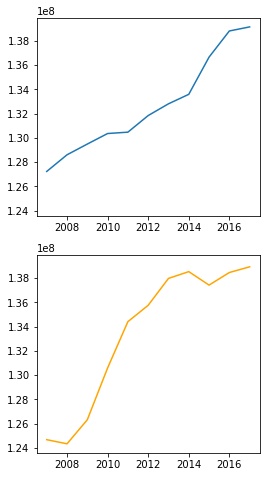

In [19]:
# plotting
fig, ax = plt.subplots(2,1, sharey=True, figsize=(4,8))
ax[0].plot(live_n_years.columns, live_n_years.values.T)
ax[1].plot(agri_n_years.columns, agri_n_years.values.T, color = 'orange')

In [20]:

# checking the null hypothesis
print(stats.ttest_ind(live_n_years.T, agri_n_years.T))
# due to the high value, we can infer that the increase is pretty similar in agriculture and livestock
live_n_years.T['Value'].corr(agri_n_years.T['Value'])
# thus, they have a high correlation, maybe some of the nitrogen generated by the manure ends up
# in the fertilizers

Ttest_indResult(statistic=array([-0.35403874]), pvalue=array([0.72701501]))


0.8341830683248027

#### AGRICULTURE vs.  LIVESTOCK GROWTH  #### 

In [21]:
# livestock size (head count)
data_lg = pd.read_csv('..\data\FAOSTAT_heads.csv')
live_g = data_lg[['Area', 'Item', 'Year', 'Value']].groupby(by=['Area', 'Year']).agg({
    'Value': sum})
live_g_years = pd.pivot_table(live_g, columns='Year', aggfunc=sum)
live_g_years

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Value,3.969444e+09,3.992806e+09,3.992004e+09,4.011917e+09,4.040939e+09,4.087345e+09,4.133090e+09,4.154855e+09,4.280471e+09,4.352631e+09,4.368454e+09


In [22]:
# agriculture by ha
data_ag = pd.read_csv('..\data\FAOSTAT_crops.csv')
agri_g = data_ag[['Area', 'Item', 'Year', 'Value']].groupby(by=['Area', 'Year']).agg({
    'Value': sum})
agri_g_years = pd.pivot_table(agri_g, columns='Year', aggfunc=sum)
agri_g_years

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Value,2.207466e+09,2.256657e+09,2.240067e+09,2.252420e+09,2.300260e+09,2.320445e+09,2.371404e+09,2.384424e+09,2.410196e+09,2.430968e+09,2.445252e+09


In [23]:
# is it growing accordingly to the world population?
## had problem importing data, so, manually:
pop = np.array([(2007, 6673105937), (2008, 6753649228), (2009, 6834721933), (2010, 6916183482),
       (2011, 6997998760), (2012, 7080072417), (2013, 7162119434), (2014, 7243784121),
       (2015, 7324782225), (2016, 7404976783), (2017, 7484325476)])
dpop = pd.DataFrame(pop).set_index(0)


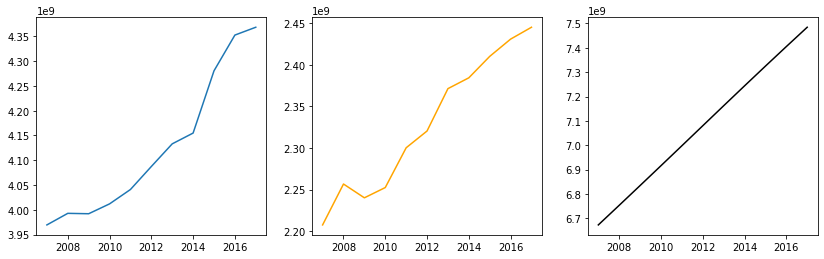

In [24]:
# plotting
fig, ax = plt.subplots(1,3, figsize=(14,4))
ax[0].plot(live_g_years.columns, live_g_years.values.T)
ax[1].plot(agri_g_years.columns, agri_g_years.values.T, color='orange')
ax[2].plot(dpop.index, dpop[1], color='black')

In [25]:
## checking if the population growth matters for agriculture / livestock growth
stats.ttest_ind(live_g_years.values.T, dpop[1]), \
stats.ttest_ind(agri_g_years.values.T, dpop[1])
## null hypothesis = population growth is not related to livestock / agriculture growth
## Rejected! Population growth might be related to increase in livestock and agriculture

(Ttest_indResult(statistic=array([-31.86503494]), pvalue=array([1.28572033e-18])),
 Ttest_indResult(statistic=array([-55.76051751]), pvalue=array([2.00993395e-23])))

In [26]:
## checking correlation
live_g_years.T['Value'].corr(dpop[1]), agri_g_years.T['Value'].corr(dpop[1])
# very high correlation between population growth and agriculture / livestock production

## ANOVA

(0.9574308456456678, 0.984367103966946)

In [27]:
# checking if agriculture and livestock growth are negatively related
# maybe if people are eating more from one type, the other grows less
# checking null hypothesis
stats.ttest_ind(live_g_years.values.T, agri_g_years.values.T), \
live_g_years.T['Value'].corr(agri_g_years.T['Value']) # correlating
## they are positively correlated, probably more related to the population growth, since they both
# have a high correlation with the population growth

(Ttest_indResult(statistic=array([35.18267122]), pvalue=array([1.83347283e-19])),
 0.9560316520029374)

#### AN INTAKE ON BRAZIL:  Relationship between forest fires and livestock vs. agriculture ####

In [28]:
# In Brazil the forest fires are caused by land owners to extend their lands,
# there has been a recent discution wether the lands are being used for cattle or crops.
# Let's find out:
data_fire = pd.read_csv('..\data\Amazon.csv')
fire = data_fire[(data_fire['year'] > 2006)]
fire = fire[['year', 'state', 'number']].groupby(by=['state', 'year']).agg({'number':sum})
fire_years = pd.pivot_table(fire, columns='year', aggfunc=sum)
fire_years.T

,number
year,
2007,33037.413
2008,29378.964
2009,39117.178
2010,37037.449
2011,34633.545
2012,40084.860
2013,35146.118
2014,39621.183
2015,41208.292


In [29]:
# Checking growth in agriculture and livestock in Brazil:
br_lg = data_lg[data_lg['Area'] == 'Brazil'].groupby(by='Year').agg({'Value':sum})
br_ag = data_ag[data_ag['Area'] == 'Brazil'].groupby(by='Year').agg({'Value':sum})
br_ag

,Value
Year,
2007,82228354.0
2008,86456962.0
2009,85709085.0
2010,84229175.0
2011,87577970.0
2012,88041498.0
2013,93220938.0
2014,98184093.0
2015,97983005.0


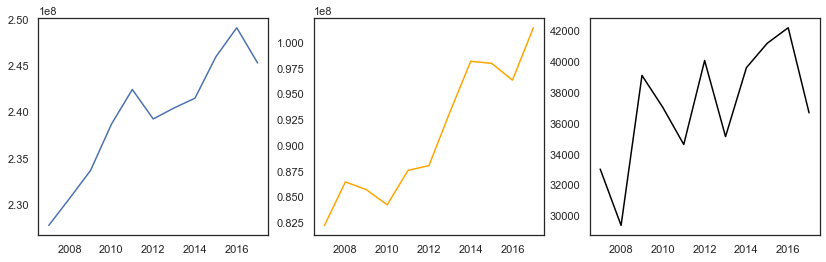

In [66]:
fig, ax = plt.subplots(1,3, figsize=(14,4))
ax[0].plot(br_lg)
ax[1].plot(br_ag, color='orange')
ax[2].plot(fire_years.T, color='black')

In [31]:
# checking the null hypothesis
stats.ttest_ind(br_lg, fire_years.T), \
stats.ttest_ind(br_ag, fire_years.T)
## Rejected! There might be a relation between forest fires and increase in agriculture and livestock

(Ttest_indResult(statistic=array([120.65837895]), pvalue=array([4.16349199e-30])),
 Ttest_indResult(statistic=array([45.76821304]), pvalue=array([1.01303829e-21])))

In [32]:
# checking correlation
fire_years.T['number'].corr(br_lg['Value']), fire_years.T['number'].corr(br_ag['Value'])
# There is a considerable correlation between forest fires increase and growth in livestock and
# agriculture. The correlation is higher on livestock growth.

(0.6818345057910017, 0.4940473465217237)

##### 3.1 Economic impact #####

In [33]:
# agriculture
data_ec = pd.read_csv('..\data\Planilha_GDP.csv', index_col='Year')
dfire = data_fire[['year', 'state', 'number']].groupby(by=['year']).agg({'number':sum})
#converting string into int
data_ec['Ramo Agrícola (A+B+C+D)'] = [
    int(i.replace(',', '')) for i in data_ec['Ramo Agrícola (A+B+C+D)']]

stats.ttest_ind(data_ec['Ramo Agrícola (A+B+C+D)'], dfire['number'])

# null hypothesis rejected, there might be a relation
data_ec

,(A) Insumos,(B) Agropecuária,(C) Indústria,(D) Serviços,Ramo Agrícola (A+B+C+D),(A) Insumos.1,(B) Agropecuária .1,(C) Indústria.1,(D) Serviços.1,Ramo Pecuário (A+B+C+D)
Year,,,,,,,,,,
1996,"21,574","149,790","394,763","433,918",1000045,"8,638","41,641","97,418","184,265","331,962"
1997,"23,311","148,674","370,663","403,917",946565,"8,075","42,470","91,054","174,278","315,878"
1998,"22,434","150,921","353,119","390,725",917198,"7,989","41,235","82,851","160,133","292,208"
1999,"23,698","152,203","354,717","397,773",928391,"9,561","45,674","78,607","150,212","284,054"
2000,"27,622","140,760","393,660","443,425",1005467,"11,276","59,242","81,503","155,319","307,341"
2001,"29,346","162,646","378,341","432,959",1003293,"11,300","67,170","87,094","169,920","335,484"
2002,"35,893","205,051","389,024","457,318",1087287,"15,827","67,367","80,331","153,001","316,525"
2003,"45,444","239,539","391,776","473,712",1150471,"19,002","77,348","75,017","141,762","313,130"
2004,"52,125","205,293","381,054","439,742",1078214,"20,187","84,832","73,346","134,132","312,498"


In [34]:
# correlation between GPD on agriculture
data_ec['Ramo Agrícola (A+B+C+D)'].corr(dfire['number'])

0.516092432122223

In [35]:
# livestock
#converting string into int
data_ec['Ramo Pecuário (A+B+C+D)'] = [
    int(i.replace(',', '')) for i in data_ec['Ramo Pecuário (A+B+C+D)']]
data_ec = data_ec[(data_ec.index > 1997) & (data_ec.index < 2018 )]
stats.ttest_ind(data_ec['Ramo Pecuário (A+B+C+D)'], dfire['number'])
# null hypothesis rejected, there might be a relation

Ttest_indResult(statistic=23.647794422646843, pvalue=2.4665695234480003e-24)

In [36]:
# correlation between GPE on livestock
data_ec['Ramo Pecuário (A+B+C+D)'].corr(dfire['number'])

0.47010776310979435

At first we might think that the correlation is a bit higher between forest fires and agriculture than with livestock, but we have to consider that the GPD in general is more related  to agriculture, since it is considerably higher than in livestock.

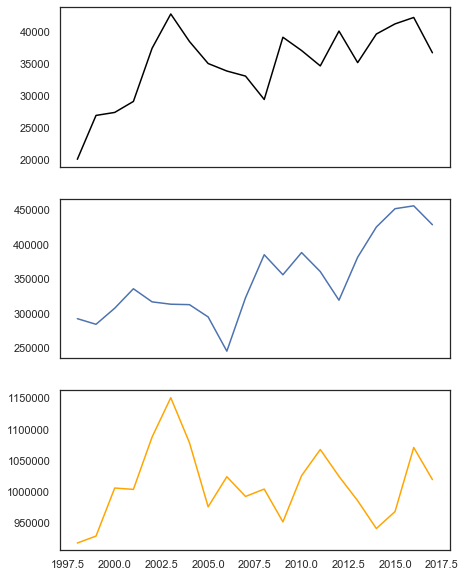

In [74]:
fig, ax = plt.subplots(3,1, sharex=True, figsize=(7,10))
ax[0].plot(dfire, color='black')
ax[1].plot(data_ec['Ramo Pecuário (A+B+C+D)'])
ax[2].plot(data_ec['Ramo Agrícola (A+B+C+D)'], color='orange')




In [38]:
# how related is the GPD for agriculture and livestock
stats.ttest_rel(data_ec['Ramo Agrícola (A+B+C+D)'], data_ec['Ramo Pecuário (A+B+C+D)'])
data_ec['Ramo Agrícola (A+B+C+D)'].corr(data_ec['Ramo Pecuário (A+B+C+D)'])
# not very much

-0.019362107781234324

In [39]:
# So, let's check the livestock vs. agriculture influence on the total GPD
gpd = pd.read_csv('..\data\PIB.csv', sep='\t', index_col='Ano')
# adjusting our stuff
gpd['Var'] = gpd['Variação anual do PIB real constante[22][23]'].str.replace(
    '%', '').str.replace(',', '.'). astype(float)
gpd = gpd['Var'].sort_index(ascending=True)
# checking null hypothesis
stats.ttest_rel(gpd, data_ec['Ramo Agrícola (A+B+C+D)']), \
stats.ttest_rel(gpd, data_ec['Ramo Pecuário (A+B+C+D)'])
# might be correlated

(Ttest_relResult(statistic=-76.92557913267633, pvalue=3.606366406382092e-25),
 Ttest_relResult(statistic=-26.412593390498564, pvalue=1.92756909329299e-16))

In [40]:
gpd.corr(data_ec['Ramo Agrícola (A+B+C+D)']), \
gpd.corr(data_ec['Ramo Pecuário (A+B+C+D)'])
# not that much correlated, the negative correlation probably means that even when some sectors
# are affected by the economy, the livestock keeps strong

(0.21298354986618853, -0.4189155984536132)

#### 4. MOST RELATED TO TEMPERATURE CHANGES ####

In [41]:
# first, analysing by area
data_t = pd.read_csv('..\data\FAOSTAT_temperature.csv')
temps = data_t.groupby(by=['Area', 'Year']).agg({'Value':sum})
[land_gas, agri_gas, live_n, agri_n, live_g, agri_g]
land_gas

Value
Area    Year           
Albania 2007    13.4502
        2008    13.4502
        2009    13.4502
        2010    13.4502
        2011    13.4502
...                 ...
Zambia  2013  8654.3456
        2014  8647.7002
        2015  8647.7002
        2016  8647.7002
        2017  8647.7002

[1133 rows x 1 columns]

##### Temperature increase vs. Area #####

In [42]:
# land for livestock gas emition relationship with temperature increase
temps_land = temps.merge(land_gas, how='inner', on=['Area', 'Year'])

area_tl = temps_land.groupby(level=0).agg({'Value_x':sum, 'Value_y':sum})

# checking the null hypothesis
stats.ttest_rel(area_tl['Value_x'], area_tl['Value_y'])[1], \
area_tl['Value_x'].corr(area_tl['Value_y']) # correlation
# not too related, pvalue not too low either

(0.0017945848134966727, -0.09647542976593734)

In [43]:
# land for agriculture gas emition relationship with temperature increase
temps_agrig = temps.merge(agri_gas, how='inner', on=['Area', 'Year'])

area_tg = temps_agrig.groupby(level=0).agg({'Value_x':sum, 'Value_y':sum})

# checking the null hypothesis
stats.ttest_rel(area_tg['Value_x'], area_tg['Value_y'])[1], \
area_tg['Value_x'].corr(area_tg['Value_y']) # correlation
# not too related, but null hypothesis rejected

(7.959743211190622e-06, 0.05835840838452466)

In [44]:
# land for livestock nitrogen emition relationship with temperature increase
temps_liven = temps.merge(live_n, how='inner', on=['Area', 'Year'])

area_tln = temps_liven.groupby(level=0).agg({'Value_x':sum, 'Value_y':sum})

# checking the null hypothesis
stats.ttest_rel(area_tln['Value_x'], area_tln['Value_y'])[1], \
area_tln['Value_x'].corr(area_tln['Value_y']) # correlation
# not too related, null hypothesis rejected

(8.971214622547108e-07, 0.062384232755035476)

In [45]:
# land for agriculture nitrogen emition relationship with temperature increase
temps_agrin = temps.merge(agri_n, how='inner', on=['Area', 'Year'])

area_tan = temps_agrin.groupby(level=0).agg({'Value_x':sum, 'Value_y':sum})

# checking the null hypothesis
stats.ttest_rel(area_tan['Value_x'], area_tan['Value_y'])[1], \
area_tan['Value_x'].corr(area_tan['Value_y']) # correlation
# not too related, null hypothesis rejected

(0.004725614626538331, 0.029745754327386558)

In [46]:
# livestock growth relationship with temperature increase
temps_liveg = temps.merge(live_g, how='inner', on=['Area', 'Year'])

area_tlg = temps_liveg.groupby(level=0).agg({'Value_x':sum, 'Value_y':sum})

# checking the null hypothesis
stats.ttest_rel(area_tlg['Value_x'], area_tlg['Value_y'])[1], \
area_tlg['Value_x'].corr(area_tlg['Value_y']) # correlation
# not too related, null hypothesis rejected

(1.5876234752653053e-06, 0.04899088722459984)

In [47]:
# agriculture growth relationship with temperature increase
temps_agrig = temps.merge(agri_g, how='inner', on=['Area', 'Year'])

area_tag = temps_agrig.groupby(level=0).agg({'Value_x':sum, 'Value_y':sum})

# checking the null hypothesis
stats.ttest_rel(area_tag['Value_x'], area_tag['Value_y'])[1], \
area_tag['Value_x'].corr(area_tag['Value_y']) # correlation
# not too related, null hypothesis rejected

(1.681049870840011e-05, 0.08655131820061657)

##### Temperature increase vs. Time #####

In [48]:
ttemps = temps.groupby(level=1).agg({'Value':'mean'}).copy()
temps_years = pd.pivot_table(ttemps, columns='Year', aggfunc=sum)
t_years = temps_years.drop(columns=2018).T
t_years

,Value
Year,
2007,0.867792
2008,0.672889
2009,0.828885
2010,0.907115
2011,0.656276
2012,0.742731
2013,0.754366
2014,0.934784
2015,1.046225


In [49]:
# livestock gas emition with temperature increase
# checking the null hypothesis
stats.ttest_ind(t_years, land_years.T)[1], \
t_years['Value'].corr(land_years.T['Value']) # correlation
# not too related, null hypothesis rejected
# it is weird that the gas emitions are supposelly decreasing

(array([6.30606364e-49]), 0.20771700905833881)

In [50]:
# gas emition relationship with temperature increase
# checking the null hypothesis
stats.ttest_ind(t_years, agri_years.T)[1], \
t_years['Value'].corr(agri_years.T['Value']) # correlation
# related, null hypothesis rejected

(array([5.1438577e-31]), 0.5504150853269278)

In [51]:
# livestock nitrogen relationship with temperature increase
# checking the null hypothesis
stats.ttest_ind(t_years, live_n_years.T)[1], \
t_years['Value'].corr(live_n_years.T['Value']) # correlation
# very related, null hypothesis rejected

(array([3.28514796e-29]), 0.7519996965762669)

In [52]:
# agriculture nitrogen relationship with temperature increase
# checking the null hypothesis
stats.ttest_ind(t_years, agri_n_years.T)[1], \
t_years['Value'].corr(agri_n_years.T['Value']) # correlation
# related, null hypothesis rejected
## nitrogen from livestock is much more related than in agriculture

(array([4.67001302e-26]), 0.4516775581221126)

In [53]:
# livestock growth relationship with temperature increase
# checking the null hypothesis
stats.ttest_ind(t_years, live_g_years.T)[1], \
t_years['Value'].corr(live_g_years.T['Value']) # correlation
# very related, null hypothesis rejected

(array([7.65544011e-28]), 0.7588591148103917)

In [54]:
# agriculture growth relationship with temperature increase
# checking the null hypothesis
stats.ttest_ind(t_years, agri_g_years.T)[1], \
t_years['Value'].corr(agri_g_years.T['Value']) # correlation
# related, null hypothesis rejected
## nitrogen from livestock is more related than in agriculture

(array([8.77505764e-28]), 0.6075726440096019)

In [55]:
# population growth relationship with temperature increase
# checking the null hypothesis
stats.ttest_ind(t_years,dpop[1])[1], \
t_years['Value'].corr(dpop[1]) # correlation
# related, null hypothesis rejected
## nitrogen from livestock is much more related than in agriculture

(array([2.84922521e-27]), 0.6524741545886074)

Conclusion: nitrogen from livestock has the biggest relationship with global warming!

In [56]:
## what if we test with only the most emiters of nitrogen, will the relationship increase?
top_list = data_n.groupby('Area').agg({'Value':sum}).sort_values(by='Value', ascending=False)[:6].index
data_n['Area'] = data_n.apply(lambda x: x['Area'] if x['Area'] in top_list else 0, axis=1)
top_ln = data_n[(data_n['Element'] == 'Amount excreted in manure (N content)') & (
    data_n['Area'] != 0)].groupby(by=['Area', 'Year']).agg({'Value':sum})
top_ln = top_ln.unstack(level=0)['Value']
top_ln

Area,Brazil,China,"China, mainland",India,Pakistan,United States of America
Year,,,,,,
2007,1.034019e+10,1.330455e+10,1.320759e+10,1.103446e+10,3.097118e+09,6.984450e+09
2008,1.050219e+10,1.362614e+10,1.353405e+10,1.103533e+10,3.190501e+09,7.026201e+09
2009,1.067478e+10,1.375199e+10,1.366384e+10,1.104354e+10,3.287595e+09,6.866736e+09
2010,1.089093e+10,1.394428e+10,1.385710e+10,1.106532e+10,3.341450e+09,6.847398e+09
2011,1.105621e+10,1.349711e+10,1.340989e+10,1.107277e+10,3.493688e+09,6.814530e+09
2012,1.093910e+10,1.353641e+10,1.344959e+10,1.106940e+10,3.601539e+09,6.750170e+09
2013,1.094537e+10,1.353216e+10,1.344899e+10,1.104816e+10,3.702162e+09,6.673348e+09
2014,1.102865e+10,1.349847e+10,1.341646e+10,1.106010e+10,3.818087e+09,6.640711e+09
2015,1.114142e+10,1.377450e+10,1.369218e+10,1.108512e+10,3.938791e+09,6.676639e+09


In [57]:
# testing null hypothesis to see relation between the increasing amount of nitrogenon livestock from
# the top 5 countries
stats.f_oneway(top_ln.Brazil,top_ln.China,top_ln['China, mainland'],top_ln.India, \
               top_ln['United States of America'])

F_onewayResult(statistic=2056.8759359613136, pvalue=8.693787325013384e-55)

In [58]:
# adjusting temperature dataset
data_t['Area'] = data_t.apply(lambda x: x['Area'] if x['Area'] in top_list else 0, axis=1)
top_t = data_t[(data_t['Area'] != 0)].groupby(by=['Area', 'Year']).agg({'Value':sum})
top_t = top_t.unstack(level=0)['Value']


In [59]:
# ttesting for each country vs. temperature change
[stats.ttest_ind(top_ln[c], top_t[c]) for c in top_list[1:]]
# all null hypothesis rejected, there might be relationship between each countrys increase in
# nitrogen from livestock and temperature increase

[Ttest_indResult(statistic=207.0635924008881, pvalue=3.010580779460484e-36),
 Ttest_indResult(statistic=356.3012591603998, pvalue=3.389056560194785e-41),
 Ttest_indResult(statistic=136.75396088203377, pvalue=1.8169017945866095e-32),
 Ttest_indResult(statistic=184.18475349530297, pvalue=3.5151049270171417e-35),
 Ttest_indResult(statistic=34.727482982696834, pvalue=4.892427846797698e-20)]

In [60]:
# correlation level
[(c,top_ln[c].corr(top_t[c])) for c in top_list]
# Brazil had the highest correlation!

[('China', 0.16999716563459016),
 ('China, mainland', 0.17371578629945944),
 ('India', 0.507115422168138),
 ('Brazil', 0.6677461540959061),
 ('United States of America', -0.05102853608591424),
 ('Pakistan', 0.1551464678288188)]

In [61]:
## Forest fires in Brazil and temperatuere increase
top_t['Brazil'].corr(dfire['number'])

0.7058306227961892

0.9081952622304205

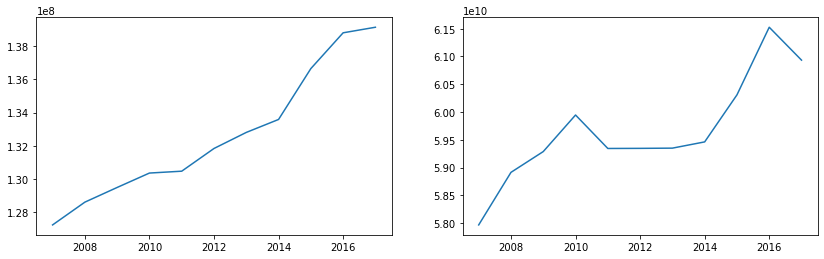

In [62]:
fig,ax=plt.subplots(1,2, figsize=(14,4))
ax[1].plot(top_ln.sum(axis=1))
ax[0].plot(live_n_years.T)

top_ln.sum(axis=1).corr(live_n_years.T['Value'])

#### Correlation HeatMap ####

In [63]:
# merging into one dataset
t_years['land_gas'] = land_years.T['Value']
t_years['agri_gas'] = agri_years.T['Value']
t_years['live_n'] = live_n_years.T['Value']
t_years['agri_n'] = agri_n_years.T['Value']
t_years['live_g'] = live_g_years.T['Value']
t_years['agri_g'] = agri_g_years.T['Value']
t_years['pop'] = dpop[1]
t_years['br_fire'] = dfire['number']
t_years = t_years.rename(columns={'Value':'temp'})
t_years

,temp,land_gas,agri_gas,live_n,agri_n,live_g,agri_g,pop,br_fire
Year,,,,,,,,,
2007,0.867792,91958.6150,1.146408e+07,1.272282e+08,1.246710e+08,3.969444e+09,2.207466e+09,6673105937,33037.413
2008,0.672889,92129.5140,1.150889e+07,1.286008e+08,1.243304e+08,3.992806e+09,2.256657e+09,6753649228,29378.964
2009,0.828885,92130.4736,1.151417e+07,1.294862e+08,1.263120e+08,3.992004e+09,2.240067e+09,6834721933,39117.178
2010,0.907115,92392.7806,1.168087e+07,1.303542e+08,1.305800e+08,4.011917e+09,2.252420e+09,6916183482,37037.449
2011,0.656276,92634.8664,1.193986e+07,1.304662e+08,1.343980e+08,4.040939e+09,2.300260e+09,6997998760,34633.545
2012,0.742731,92757.7560,1.197302e+07,1.318353e+08,1.357483e+08,4.087345e+09,2.320445e+09,7080072417,40084.860
2013,0.754366,92780.6322,1.186591e+07,1.328030e+08,1.379637e+08,4.133090e+09,2.371404e+09,7162119434,35146.118
2014,0.934784,92685.7540,1.195613e+07,1.335844e+08,1.385230e+08,4.154855e+09,2.384424e+09,7243784121,39621.183
2015,1.046225,92654.1406,1.209501e+07,1.366500e+08,1.374136e+08,4.280471e+09,2.410196e+09,7324782225,41208.292


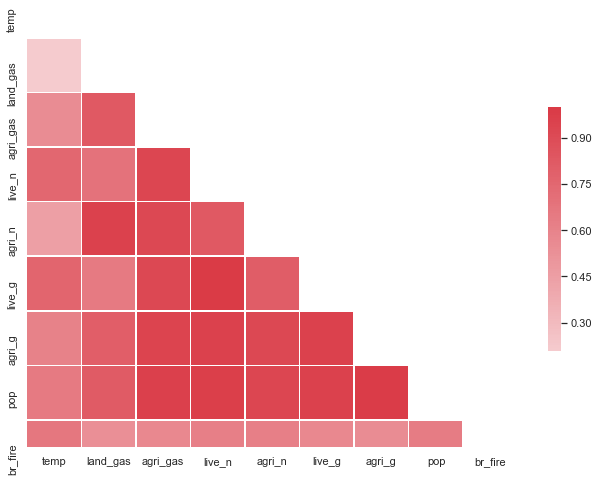

In [64]:
sns.set(style="white")
corr = t_years.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [65]:

t_years['temp'].corr(agri_years_a.T['agri']), \
t_years['temp'].corr(agri_years_a.T['land'])

(0.5504150853269308, 0.5504150853269286)